<a href="https://colab.research.google.com/github/GabrielBMiranda/Prob_Inf_-_SHT2/blob/main/ProbInf_TH2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=gray> Probabilidade e Inferência Estatística</font>
### Testes de Hipóteses para Duas Populações

Programa de Pós-Graduação em Matemática

> Autor: Gabriel Brandão de Miranda 

> Pós-Graduação em Modelagem Computacional

> Julho de 2021

**Esse notebook explora uma base de dados de jogadores de futebol no ano de 2018 e emprega testes de hipóteses para verificar com algum nível de confiança que jogadores brasileiros são melhores, piores ou possuem a mesma habilidade que jogadores de outros países, partindo da hipótese de que a habilidade futebolística não varia geograficamente. Destaco ainda que o notebook tem por objetivo principal o estudo dos métodos de testes de hipóteses no contexto de duas populações. Desse modo, não foram levados em consideração possíveis problemas ao fazer hipóteses de normalidade e estratificação dos dados.**

- *Uma nova seção foi adicionada ao notebook a título de curiosidade do autor para avaliar uma abordagem bayesiana sobre o mesmo problema.*

## <font color=gray> Preliminares </font>
Antes começarmos com o trabalho importamos algumas bibliotecas úteis para tratamento e análise exploratória de dados e ainda baixamos os dados para o ambiente virtual do `Google Colab`, trazendo de um local do `Google Drive`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

def disp( s ):
  display(Markdown(s))

plt.style.use('seaborn') 
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

!gdown 'https://drive.google.com/uc?id=12DNsZiVjwuaQYy6n3AIQHEYhFRZ8AH-6'

Downloading...
From: https://drive.google.com/uc?id=12DNsZiVjwuaQYy6n3AIQHEYhFRZ8AH-6
To: /content/soccer_players.csv
100% 3.93M/3.93M [00:00<00:00, 18.4MB/s]


# <font color=green>1 CONHECENDO OS DADOS</font>
---

Base de Dados: [Estatísticas de Jogadores Profissionais de Futebol em 2018](https://www.kaggle.com/antoinekrajnc/soccer-players-statistics)

A fim de apresentar o universo em que se pretende trabalhar, fazemos uma breve etapa de exploração e tratamento dos dados nesta seção.
***

## <font color=green> 1.1 Importação dos Dados </font>

Primeiramente importamos os dados brutos e apresentamos uma pequena amostra dos dados bem como algumas estatísticas de resumo desses mesmos dados.

In [ ]:
raw_data = pd.read_csv('soccer_players.csv')
raw_data.sample(10)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
1881,Joel Ward,England,NaN,NaN,Crystal Palace,RB,2.0,05/01/2012,2018.0,75,188 cm,83 kg,Right,10/29/1989,27,RB/LB,Medium / Medium,3,2,67,64,77,77,78,74,73,64,77,68,73,73,70,69,68,69,77,78,63,66,66,75,68,46,63,43,34,40,33,10,8,7,7,11
8950,Christophe Diedhiou,Senegal,NaN,NaN,GFC Ajaccio,Sub,25.0,07/16/2016,2018.0,66,190 cm,76 kg,Right,01/08/1988,29,CB/LB,Medium / Medium,3,2,39,35,65,66,69,72,50,23,65,32,47,25,47,32,73,75,61,77,50,45,56,68,34,24,22,28,32,39,24,6,16,6,11,13
14069,Shannon Gomez,Trinidad & Tobago,NaN,NaN,NYCFC,Sub,52.0,01/04/2017,2020.0,60,170 cm,64 kg,Right,10/05/1996,20,RB/RW,Medium / High,3,2,49,52,52,55,57,69,56,47,58,41,53,51,52,41,83,79,79,68,84,64,61,41,46,35,40,52,38,54,39,14,11,9,11,11
16815,Marcin Mielczarski,Poland,NaN,NaN,Wisła Płock,Res,4.0,01/14/2017,2019.0,53,176 cm,65 kg,Left,05/24/1998,18,LB,Medium / Medium,2,2,45,54,49,51,52,47,55,46,53,40,35,51,41,38,66,62,57,41,68,52,55,45,30,31,31,40,30,36,28,8,9,6,8,10
11002,Borja,Spain,NaN,NaN,Sevilla Atlét.,Sub,18.0,08/16/2016,2019.0,64,173 cm,67 kg,Right,03/16/1997,20,RB,Medium / High,3,2,53,59,59,67,63,71,61,44,65,41,47,61,56,29,72,71,67,64,82,61,70,54,48,31,29,53,37,46,30,10,15,12,10,11
7223,Manassé Enza-Yamissi,Central African Rep.,NaN,NaN,US Orléans,Sub,18.0,07/01/2015,2017.0,68,190 cm,82 kg,Left,09/28/1989,27,CB,Medium / High,3,2,57,60,67,63,65,68,50,46,69,23,72,56,63,57,74,78,72,82,47,60,74,63,59,33,30,43,28,37,27,8,10,7,9,11
9549,Chris Dagnall,England,NaN,NaN,Crewe Alexandra,RW,9.0,07/05/2016,2018.0,66,173 cm,75 kg,Right,04/15/1986,30,ST,High / High,3,3,64,65,21,14,24,56,60,69,33,56,67,41,55,49,72,71,75,68,74,72,70,57,67,67,66,42,41,64,65,15,8,13,7,14
13253,Ayaz Guliev,Russia,NaN,NaN,Anzhi Makhachkala,Sub,77.0,01/01/2013,2017.0,61,169 cm,64 kg,Right,02/27/1996,21,CDM/CAM,Medium / Medium,4,2,65,68,59,59,60,60,53,55,56,54,47,51,63,64,73,65,67,58,87,71,59,51,59,45,41,42,48,51,47,13,15,12,8,8
17387,Aaron Jones,England,NaN,NaN,Philadelphia,Res,19.0,01/13/2017,2020.0,50,175 cm,73 kg,Right,03/11/1994,23,RB,Low / High,2,2,33,49,49,60,54,46,50,36,47,37,30,39,21,27,65,57,61,51,73,59,57,42,25,20,22,29,31,37,21,10,9,6,7,14
3685,Jean-Armel Kana-Biyik,Cameroon,NaN,NaN,Kayserispor,RCB,76.0,08/04/2016,2019.0,72,184 cm,86 kg,Right,07/03/1989,27,CB,High / Medium,3,2,59,56,70,66,71,80,70,35,69,48,71,36,62,57,63,65,70,83,54,52,74,73,44,20,38,24,19,45,30,13,15,15,13,8


In [ ]:
raw_data.describe()

,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
count,1075.000000,17587.000000,17587.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000,17588.000000
mean,12.219535,21.294536,2018.899414,66.166193,25.460314,2.934103,2.303161,57.972766,54.802877,44.230327,45.565499,47.441096,55.920173,61.770582,49.592051,46.794064,52.707869,55.853139,49.741073,58.119798,52.396065,65.287867,65.483853,63.476916,65.085854,64.008813,63.206732,64.918524,52.393109,55.581192,45.157607,47.403173,47.181146,43.383443,49.165738,43.275586,16.609620,16.823061,16.458324,16.559814,16.901183
std,6.933187,19.163741,1.698787,7.083012,4.680217,0.655927,0.746156,16.834779,18.913857,21.561703,21.515179,21.827815,17.445464,9.275210,19.407087,20.494715,14.589446,13.485994,18.457977,14.982582,15.616071,14.436296,14.100615,15.477377,12.532989,13.720288,14.618163,11.430807,17.473703,17.600155,19.374428,19.211887,18.464396,17.701903,15.871735,17.710839,17.139904,17.798052,16.600741,16.967256,18.034485
min,1.000000,1.000000,2017.000000,45.000000,17.000000,1.000000,1.000000,5.000000,4.000000,3.000000,5.000000,3.000000,2.000000,29.000000,2.000000,3.000000,10.000000,5.000000,6.000000,10.000000,7.000000,11.000000,11.000000,10.000000,20.000000,10.000000,11.000000,15.000000,4.000000,3.000000,2.000000,4.000000,6.000000,4.000000,7.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,9.000000,2017.000000,62.000000,22.000000,3.000000,2.000000,53.000000,47.000000,22.000000,23.000000,26.000000,44.000000,55.000000,37.000000,26.000000,43.000000,47.000000,38.000000,52.000000,42.000000,57.000000,58.000000,57.000000,57.000000,56.000000,55.000000,58.000000,45.000000,45.000000,29.000000,32.000000,34.000000,31.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,12.000000,18.000000,2019.000000,66.000000,25.000000,3.000000,2.000000,63.000000,60.000000,48.000000,51.000000,54.000000,59.000000,62.000000,54.000000,52.000000,54.000000,57.000000,54.000000,62.000000,56.000000,68.000000,68.000000,66.000000,66.000000,65.000000,65.000000,65.000000,56.000000,59.000000,48.000000,52.000000,48.000000,42.000000,50.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,18.000000,27.000000,2020.000000,71.000000,29.000000,3.000000,3.000000,69.000000,68.000000,64.000000,64.000000,66.000000,70.000000,68.000000,64.000000,64.000000,64.000000,66.000000,64.000000,68.000000,64.000000,75.000000,75.000000,74.000000,74.000000,74.000000,74.000000,73.000000,65.000000,69.000000,61.000000,63.000000,62.000000,57.000000,61.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,36.000000,99.000000,2023.000000,94.000000,47.000000,5.000000,5.000000,95.000000,97.000000,92.000000,95.000000,92.000000,96.000000,96.000000,94.000000,93.000000,94.000000,94.000000,91.000000,92.000000,93.000000,96.000000,96.000000,95.000000,98.000000,97.000000,96.000000,95.000000,94.000000,93.000000,95.000000,91.000000,92.000000,93.000000,96.000000,93.000000,91.000000,89.000000,95.000000,91.000000,90.000000


## <font color=green> 1.2 Tratamento dos Dados </font>

Em sequência filtramos apenas os dados com que desejamos trabalhar: o nome, a nacionalidade e nota do jogador. 

A distribuição das notas possui certo nível de simetria e forma de onde iremos supor normalidade dos dados para seguirmos com nossas análises.

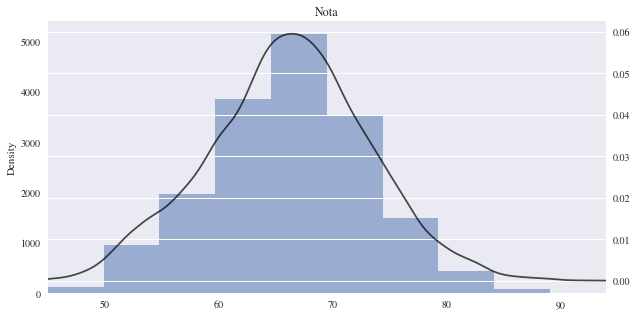

,Name,Nationality,Rating
0,Cristiano Ronaldo,Portugal,94
1,Lionel Messi,Argentina,93
2,Neymar,Brazil,92
3,Luis Suárez,Uruguay,92
4,Manuel Neuer,Germany,92


In [ ]:
df = raw_data[['Name','Nationality','Rating']]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df.Rating.hist(ax = ax,alpha=0.5)
df.Rating.plot.kde(ax = ax, secondary_y=True, title='Nota', color = 'k',alpha=0.7)
ax.set_xlim( df.Rating.min(), df.Rating.max() )
plt.show()

df.head(5)

## <font color=green> 1.3 Definição das Populações </font>

Agora separamos os dados em brasileiros e não brasileiros. Onde já definimos as populações
$$
  X \sim N(\mu_1,\sigma_1)
  \quad \text{e} \quad
  Y \sim N(\mu_2,\sigma_2),
$$
referentes às notas dos jogadores brasileiros e às notas dos jogadores estrangeiros.

In [ ]:
X = df[ df.Nationality == 'Brazil' ] 
# Y = df[ df.Nationality == 'Germany' ] 
Y = df[ df.Nationality != 'Brazil' ] 

X = X[ ['Name','Rating'] ] 
Y = Y[ ['Name','Rating'] ] 

X.sample(5)

,Name,Rating
4694,Diegildo Ramos,70
3101,Léo Matos,73
2038,Alvildo Sousa,74
11889,Rodolfo Pittaça,63
7653,Marcelinho Moraisco,67


⭐ **Seleção das Populações**

In [ ]:
x = X.describe()
x['Y (🌎)'] = Y.describe()
x.rename(columns={"Rating": "X (🇧🇷)"})

,X (🇧🇷),Y (🌎)
count,921.000000,16667.000000
mean,70.023887,65.953021
std,5.600803,7.095212
min,52.000000,45.000000
25%,66.000000,61.000000
50%,70.000000,66.000000
75%,74.000000,71.000000
max,92.000000,94.000000


Perceba que temos médias e variâncias diferentes para essas amostras, porém devemos verificar com que nível de confiança podemos afirmar que a média brasileira é melhor que o restante do mundo. E assim faremos!

# <font color=green>2 TESTES DE HIPÓTESES </font>

---

Tendo as amostras agrupadas por países, isto é, diferentes amostras de diferentes populações, nesta seção vamos testar algumas hipóteses sobre esses dados.

***

### Métodos empregados:
Iremos utilizar três diferentes métodos para testagem das nossas hipóteses a serem formuladas:

- Método do Intervalo de Confiança
- Método Tradicional ou Região Crítica
- Método do Valor P

Para testagem da média da distribuição, que é o parâmetro de maior interesse no nosso problema, devemos primeiramente verificar a semelhança da variância entre as populações para decidir como prosseguir, desse modo iniciamos o estudo com esse objetivo.

## <font color=green>2.1 Comparação das Variâncias  </font>

### *Um pouco de teoria:*

*Supondo duas amostras independentes, de tamanhos $n_{1}$ e $n_{2}$, retiradas de duas populações normais com a mesma variância $\sigma^{2} = \sigma_1^2 = \sigma_2^2$. Indiquemos os estimadores de $\sigma^{2}$ obtidos das amostras $X_1,\dots ,X_{n_1}$ e $Y_1,\dots, Y_{n_2}$ por $S_{1}^{2}$ e $S_{2}^{2}$, respectivamente. Temos que 
$$
\begin{array}{l}
U=\frac{\left(n_{1}-1\right) S_{1}^{2}}{\sigma^{2}} \sim \chi^{2}\left(n_{1}-1\right)
\quad \text{e} \quad
V=\frac{\left(n_{2}-1\right) S_{2}^{2}}{\sigma^{2}} \sim \chi^{2}\left(n_{2}-1\right)
\end{array}
$$
são quantidades pivotais para a estimação das variâncias de cada uma das populações. Operando sobre essas quantidades podemos estabelecer
$$
R = \frac{S_{1}^{2}}{S_{2}^{2}}=\frac{\frac{U}{n_{1}-1}}{\frac{V}{n_{2}-1}} \sim F\left(n_{1}-1, n_{2}-1\right),
$$
onde $F(\cdot,\cdot)$ é a distribuição F de Fisher-Snedecor. A variável $R$ será útil para a condução dos nossos testes sobre as variâncias.*

### <font color=green>2.1.1 Formulação das Hipóteses: </font>

Como dito anteriormentes partimos da suposição de que a média da variância das notas dos jogadores é igual e queremos testar a veracidade dessa afirmação. Assim formulamos:

  - $H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2}=\sigma^{2}$ \\
  - $H_{1}: \sigma_{1}^{2} \neq \sigma_{2}^{2}$

Desejamos testar essa hipótese a um nível de confiança $\gamma = 99\%$. Fazemos essa escolha pois nossa amostra traz um viés grande da ponto de vista da coleta dos dados. Poucas divisões de campeonatos brasileiros parecem ser levados em consideração e muitas ligas mais baixas de alguns países, como por exemplo a Inglaterra, são levadas em consideração. Dessa forma damos uma grande chance do teste ser rejeitado.

Dessa forma, definimos os parâmetros de entrada, isto é, os valores necessários para execução estudo sob qualquer um dos métodos.

In [ ]:
alpha = 0.01
disp(r'$\alpha = {:.1e} \implies  \alpha/2 = {:.1e} $'.format( alpha,  alpha/2))

disp(r'$\textbf{Variáveis para as populações X e Y}:$')

s2X = X.var()[0]
s2Y = Y.var()[0]
disp(r'$s^2_1\approx {:.3e}, \quad s^2_2\approx {:.3e}$'.format( s2X, s2Y )) 

nX = len(X)
nY = len(Y)
disp(r'$n_1 = {}, \qquad n_2 = {}$'.format( nX,  nY) )


$\alpha = 1.0e-02 \implies  \alpha/2 = 5.0e-03 $

$\textbf{Variáveis para as populações X e Y}:$

$s^2_1\approx 3.137e+01, \quad s^2_2\approx 5.034e+01$

$n_1 = 921, \qquad n_2 = 16667$

### <font color=green>2.1.2 Método do Intervalo de Confiança </font>

O primeiro teste empregado baseia-se na construção de um intervalo de confiança para $R$ que é uma quantidade pivotal referente à razão entre as quantidade pivotais para as variâncias. Pela definição dada anteriormente para $R$ em função dos estimadores das variâncias $\sigma_{1}^{2}$ e $\sigma_{2}^{2}$, devemos verificar se a razão entre as variâncias 
está contida num intervalo de confiança dado um nível confiança do experimento $\gamma = 1 - \alpha$, denotado por
$$
f_{1} \frac{s_{2}^{2}}{s_{1}^{2}}<\frac{\sigma_{2}^{2}}{\sigma_{1}^{2}}<f_{2} \frac{s_{2}^{2}}{s_{1}^{2}}
$$
onde $f_1$ e $f_2$ são dadas pela função quantil ou função de ponto percentual (*PPF*) da distribuição $F(n_1-1,n_2-1)$ nos pontos $\alpha/2$ e $1-\alpha/2$ respectivamente, ilustrado pela figura a seguir.

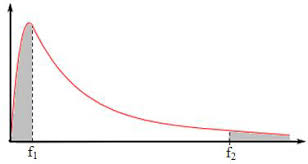

Ora, para que nossa hipótese seja verdadeira devemos ter $$\frac{\sigma_{2}^{2}}{\sigma_{1}^{2}} = 1,$$ portanto para testar sua validade basta verificar se 
$$
  1 \in \left( f_{1} \frac{s_{2}^{2}}{s_{1}^{2}}, f_{2} \frac{s_{2}^{2}}{s_{1}^{2}}\right).
$$
E assim faremos.

In [ ]:
from scipy.stats import f as f_snedecor

F = f_snedecor(nX-1,nY-1)

r = s2X/s2Y
disp(r'$(s_1/s_2)^2 \approx {:.3e}.$'.format(r) )

f1 = F.ppf(  alpha/2)
f2 = F.ppf(1-alpha/2)
disp(r'$f_1\approx {:.3e}, \quad f_2\approx {:.3e}$'.format( f1, f2)) 

$(s_1/s_2)^2 \approx 6.231e-01.$

$f_1\approx 8.813e-01, \quad f_2\approx 1.128e+00$

In [ ]:

linf =  round(f1/r,4)
lsup =  round(f2/r,4)
disp(r'$I_c \approx [{},{}]$'.format(linf,lsup) )

$I_c \approx [1.4143,1.8103]$

<font color=blue> Portanto, pelo **Método do Intervalo de Confiança** rejeitamos a hipótese nula com uma confiança de 99%, isto é, temos que a variância entre as duas populações não é a mesma
$$
  \sigma^2_1 \neq \sigma^2_2.
$$
A variabilidade das notas em cada uma das populações não se comporta da mesma maneira. O que pode decorrer do método de coleta dos dados abordado anteriormente.
</font>

### <font color=green>2.1.3 Método Tradicional </font>

Neste método verificamos se a estatística 
$$
  r_0 = \frac{s^2_1}{s^2_2}
$$
está contida na região crítica ou região de rejeição
$$
  RR = (0,f_1] \cup [f_2,\infty),
$$
que nada mais é do que o complementar do nosso intervalo de confiança no espaço da hipótese dado pela distribuição F de Snedecor. Logo, pelos valores já computados pelo método anterior temos

In [ ]:
disp(r'$r_0 \; \approx \; {:.3e}.$'.format(r) )
disp(r'$RR \, \approx \, (0,\;{:.3e}]\;\cup\;[{:.3e},\;\infty)$'.format(f1,f2) )

$r_0 \; \approx \; 6.231e-01.$

$RR \, \approx \, (0,\;8.813e-01]\;\cup\;[1.128e+00,\;\infty)$

<font color=blue> Portanto
$$
  r_0 \notin RR,
$$
em outras palavras, também pelo **Método Tradicional** rejeitamos a hipótese nula com 99% de confiança para essas amostras, em outras palavras, a variância entre as duas populações não é a mesma
$$
  \sigma^2_1 \neq \sigma^2_2.
$$
</font>

### <font color=green>2.1.4 Método do Valor P </font>

Neste método calculamos o menor nível de significância com que se rejeitaria a hipótese nula, chamado de *p-valor* e nesse caso, sendo um teste bilateral, é denotado por
$$
    \text{P} = \min\left\{P(F > r_0) , P(F < r_0)\right\}
$$
onde $ F \sim F(n_1-1,n_2-1)$ é a nossa quantidade pivotal apresentada anteriormente. E $r_0$ a estatística obtida pelo método tradicional.

Portanto, para o caso bilateral, se tivermos 
$$
  \text{P} < \frac{\alpha}{2}
$$
rejeitamos a hipótese nula.

In [ ]:
Ps = min(F.cdf(r),1-F.cdf(r))
disp(r'$\text P \approx {:.2e}, \quad \alpha/2 \approx {:.2e}.$'.format(Ps,alpha/2))


$\text P \approx 1.73e-20, \quad \alpha/2 \approx 5.00e-03.$

<font color=blue> Portanto
$$
  \text P < \frac{\alpha}{2},
$$
e pelo **Método do Valor P**, não só rejeitamos a hipótese nula, como percebemos que a hipótese só seria aceita (lê-se não rejeitada) com um nível ínfimo de significância. Desse modo, concluímos que 
$$
  \sigma^2_1 \neq \sigma^2_2.
$$
e damos sequência para a avaliação das médias considerando variâncias diferentes.

Antes de prosseguirmos apresentamos a função de densidade de probabilidade (*PDF*) que segue $F(n_1-1,n_2-1)$ a fim de ilustrar os métodos empregados aqui.

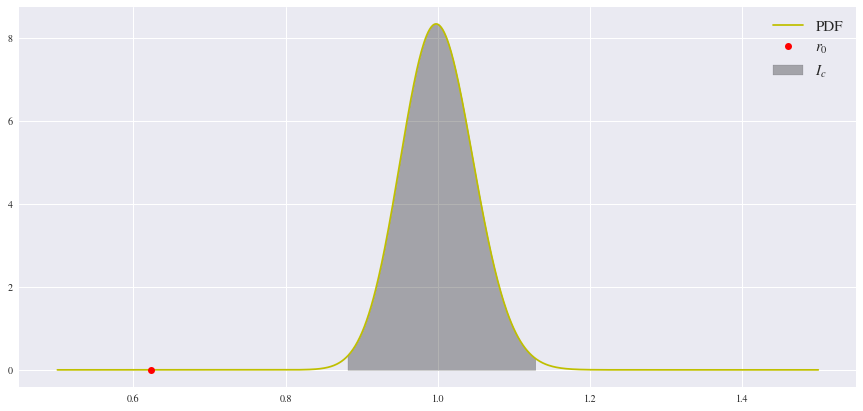

In [ ]:
# samples = F.rvs( size=100000, random_state=123 )

xs = np.linspace(0.5, 1.5, 1000)

plt.figure(figsize=(15,7))
# plt.vlines(x = r, ymin = 0, ymax = np.max(F.pdf(xs)), linestyles='dashed', colors='red', label=r'$r_0$')

plt.plot(xs, F.pdf(xs),'y', label='PDF')
plt.fill_between(np.linspace(f1,f2, 100),0,F.pdf(np.linspace(f1,f2,100)),alpha=0.3,color='k',label=r'$I_c$')
plt.plot([r],[0],'ro',label=r'$r_0$')
plt.legend(loc='best',fontsize=15)
plt.show()

O ponto $r_0$ e o limite de $I_c$ nos dá uma ideia da distância da menor significância onde a hipótese seria descartada. Para o nível de significância $\alpha$ adotado aqui, temos a região de aceitação ilustrada pela área sombreada e a região crítica dada pelo complementar disso no domínio do suporte da distribuição $(0,\infty)$.

## <font color=green>2.2 Comparação das Médias de duas Populações: </font>
#### <font color=green> Amostras Independentes, Variâncias Desconhecidas e Diferentes </font>

Concluído o estudo sobre as variâncias iremos agora de fato verificar as diferenças entre as médias das populações levando em consideração que não conhecemos as variâncias e essas não são iguais.

Relembrando, para amostras $X_1,\dots ,X_{n_1} \sim N(\mu_1,\sigma^2_1)$ e $Y_1,\dots, Y_{n_2} \sim N(\mu_2,\sigma^2_2)$, temos os estimadores da média e da variância dados por
$$
\begin{aligned}
\bar{X} &=\frac{1}{n_1} \sum_{i=1}^{n_1} X_{i}, \quad S_{1}^{2}=\frac{1}{n_1-1} \sum_{i=1}^{n_1}\left(X_{i}-\bar{X}\right)^{2}, \\
\bar{Y} &=\frac{1}{n_2} \sum_{i=1}^{n_2} Y_{i}, \quad S_{2}^{2}=\frac{1}{n_2-1} \sum_{i=1}^{n_2}\left(Y_{i}-\bar{Y}\right)^{2}.
\end{aligned}
$$

Sob a hipótese de igualdade das médias, isto é, $\mu_{1}=\mu_{2}$:
$$
E(\bar{X}-\bar{Y})=0,
\qquad
\operatorname{Var}(\bar{X}-\bar{Y})=\operatorname{Var}(\bar{X})+\operatorname{Var}(\bar{Y})=\frac{\sigma_{1}^{2}}{n_1}+\frac{\sigma_{2}^{2}}{n_2}.
$$
Como $\bar{X}-\bar{Y}$ tem distribuição normal, se as variâncias fossem conhecidas, teríamos a estatística
$$
Z=\frac{\bar{X}-\bar{Y}}{\sqrt{\sigma_{1}^{2} / n_1+\sigma_{2}^{2}/ n_2}} \sim N(0,1).
$$
Porém, nesse caso - e como na maioria dos problemas reais - a variância é desconhecida, logo
$$
T=\frac{\bar{X}-\bar{Y}}{\sqrt{S_{1}^{2} / n_1+S_{2}^{2}/ n_2}} \sim t\left(\nu\right),
$$
onde, sob hipótese de igualdade das médias, temos o número de graus de liberdade
$$
\nu=\left\lfloor\frac{(A+B)^{2}}{A^{2} /(n_1-1)+B^{2} /(n_2-1)}\right\rceil
$$
tal que 
$$
A=s_{1}^{2} / n_1, \quad B=s_{2}^{2} / n_2.
$$

Essa variável $T$ será útil para condução de nossos testes a seguir, lembrando que para um número de graus de liberdade maior que 30, a distribuição t de Student se aproxima de uma distribuição normal padrão.

### <font color=green>2.2.1 Formulação das Hipóteses: </font>

Partindo da suposição de igualdade das médias formulamos:

  - $H_{0}: \mu_{1} =    \mu_{2} = \mu$ \\
  - $H_{1}: \mu_{1} \neq \mu_{2}$

Desejamos testar essa hipótese a um mesmo nível de confiança como feito para as variâncias pelos mesmos motivos apresentados, i.e $\gamma = 99\%$.

Assim, os parâmetros de entrada são os mesmos do problema anterior a se acrescentar as médias dadas por

In [ ]:
mX = X.mean()[0]
mY = Y.mean()[0]
disp(r'$\bar x\approx {:.3f}, \quad \bar y\approx {:.3f}$'.format( mX, mY )) 

$\bar x\approx 70.024, \quad \bar y\approx 65.953$

Vamos verificar ainda o número de graus de liberdade para confirmar nossa escolha de distribuição para modelagem

In [ ]:
A = s2X/nX
B = s2Y/nY

nu = round( (A + B)**2/( A**2/(nX-1) + B**2/(nY-1) ) )
disp(r'$\nu = {}$'.format( nu )) 

$\nu = 1090$

Portanto podemos modelar como 
$$
T=\frac{\bar{X}-\bar{Y}}{\sqrt{S_{1}^{2} / n_1+S_{2}^{2}/ n_2}} \sim N(0,1),
$$
e ainda definindo $\Delta = \mu_1 -\mu_2$, podemos reescrever as hipóteses como
  - $H_{0}: \Delta = 0$ \\
  - $H_{1}: \Delta \neq 0$

### <font color=green>2.2.2 Método do Intervalo de Confiança </font>

Repetimos o mesmo primeiro teste executa na subseção 2.1, em que construímos um intervalo baseado na nossa modelagem, agora de maneira mais enxuta pela simetria da normal, definimos
$$
  I_c = (\bar{x} - \bar{y}) \pm z_c \sqrt{s^2_1/n_1+s^2_2/n_2}.
$$
onde $z_c = \Phi^{-1}(\alpha/2)$ é a *PPF* da normal padrão

In [ ]:
from scipy.stats import norm

delta = mX - mY
disp(r'$\Delta \approx {:.3f}$'.format(delta) )

zc = norm.ppf(1-alpha/2)
eps = zc * np.sqrt( s2X/nX + s2Y/nY )
disp(r'$\epsilon \approx {:.3f}$'.format(eps) )

disp(r'$I_c \approx {:.3f} \pm {:.3f} $'.format(delta,eps) )

$\Delta \approx 4.071$

$\epsilon \approx 0.496$

$I_c \approx 4.071 \pm 0.496 $

<font color=blue> Portanto, pelo **Método do Intervalo de Confiança** rejeitamos a hipótese nula com 99% de confiança, isto é, a média entre as duas populações não é a mesma. 
$$
  \mu_1 \neq \mu_2.
$$
</font>

### <font color=green>2.2.3 Método Tradicional </font>

Neste método verificamos se a estatística 
$$
  z_0 = \frac{\Delta}{\sqrt{s^2_1/n_1+s^2_2/n_2}}
$$
está contida na região de rejeição
$$RR = \{ x \in \mathbb{R} : |x| > z_c \},$$
complementar do intervalo de confiança no espaço da hipótese. Logo, temos

In [ ]:
z0 = delta / np.sqrt( s2X/nX + s2Y/nY )
disp(r'$z_0 \; \approx \; {:.3f}.$'.format(z0) )

$z_0 \; \approx \; 21.141.$

<font color=blue> Portanto, pelo **Método Tradicional** com 99% de confiança também rejeitamos a hipótese nula.
$$
  \mu_1 \neq \mu_2.
$$
</font>


### <font color=green>2.2.4 Método do Valor P </font>

Calculamos por fim o menor nível de significância com que se rejeitaria a hipótese nula ou o p-valor
$$
    \text{P} = P(T > z_0)
$$
onde $ T \sim N(0,1)$ e $z_0$ foi obtido pelo método tradicional.

In [ ]:
Pm = 1 - norm.cdf(z0)
disp(r'$\text P \approx {:.2e}, \quad \alpha/2 \approx {:.2e}.$'.format(Pm,alpha/2))

$\text P \approx 0.00e+00, \quad \alpha/2 \approx 5.00e-03.$

<font color=blue> Portanto pelo **Método do Valor P**
$$
  \text P < \frac{\alpha}{2},
$$
e a hipótese nula é rejeitada
$$
  \mu_1 \neq \mu_2.
$$
Ainda, perceba que o valor $\text{P}$ é aproximadamente zero, isso significa que poderíamos conduzir um teste tal que $$\gamma = 1 - \alpha \rightarrow 1, $$ em outras palavras, com uma confiança muito próxima de 100%, que ainda rejeitaríamos a hipótese.

Como de fato, pela estimativa de densidade por Kernel (*KDE*) podemos observar certa superioridade do Brasil em relação ao restante do mundo quanto às notas dos jogadores.

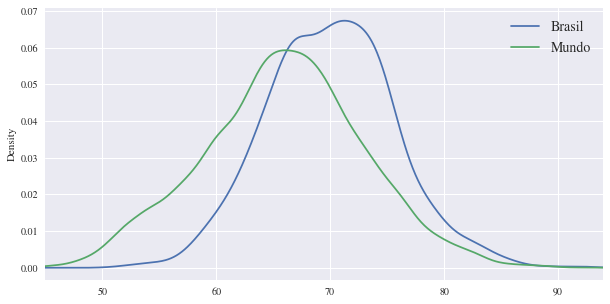

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
X.Rating.plot.kde(ax = ax,label='Brasil')
Y.Rating.plot.kde(ax = ax,label='Mundo')
ax.set_xlim(df.Rating.min(),df.Rating.max())
plt.legend(loc='best',fontsize=14)
plt.show()

# <font color=green>3 CONCLUSÕES </font>

---
Nesta seção final apresentamos breves conclusões e consideração sobre os resultados obtidos.
***

Supondo que os dados representem bem as duas populações estudadas, de jogadores brasileiros e jogadores do resto do mundo, poderíamos afirmar sob a ótica da modelagem feita que em os **jogadores brasileiros são melhores que jogadores do resto do mundo** com uma confiança de 99%.

Poderíamos selecionar de uma maneira melhor os dados, amostrando as duas populações e/ou considerando apenas países com expressividade no futebol, para verificar esse resultado. De forma simples isso pode ser feito nesse notebook apenas alterando o código em (⭐ **Seleção das Populações**) para um ou mais países de sua escolha, o código executa os mesmos testes sem perdas.

Os testes executados supõem normalidade das populações, para testes considerando $X$ e $Y$ quaisquer, poderíamos empregar o teste de Wilcoxon. Tanto esse teste quanto os testes executados aqui possuem uma rotina consolidade implementada no pacote `stats` da biblioteca `SciPy`, utilizada aqui apenas para modelar as distribuições.



# <font color=green>REFERÊNCIAS </font>

- Casella, G., & Berger, R. L. (2002). Statistical inference. Cengage Learning.
- Morettin, P. A., & Bussab, W. O. (2017). Estatística básica. Saraiva Educação SA.


# <font color=green> Apêndice A: UMA APROXIMAÇÃO BAYESIANA </font>

Nesta seção faremos uma breve análise das populações por meio de uma abordagem bayesiana onde partimos de uma distribuição uniforme do parâmetro $\mu$, isto é, da média da população amparando nossa escolha pelo Princípio da Máxima Entropia onde assumimos desconhecimento da média real da população e consideramos apenas o intervalo do suporte.

In [ ]:
import pymc3 as pm

lb = df['Rating'].min()
ub = df['Rating'].max()

with pm.Model() as model:
  mu_X = pm.Uniform("mu_X", lb, ub)
  mu_Y = pm.Uniform("mu_Y", lb, ub)

  delta = pm.Deterministic("delta", mu_X - mu_Y)

  obs_X = pm.Normal("obs_X", mu_X, observed=X['Rating'])
  obs_Y = pm.Normal("obs_Y", mu_Y, observed=Y['Rating'])

  step = pm.Metropolis()
  trace = pm.sample(20000, step=step)
  burned_trace=trace[1000:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [mu_Y]
>Metropolis: [mu_X]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 2 chains for 1_000 tune and 20_000 draw iterations (2_000 + 40_000 draws total) took 17 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
burned_trace['delta'].shape

(38000,)

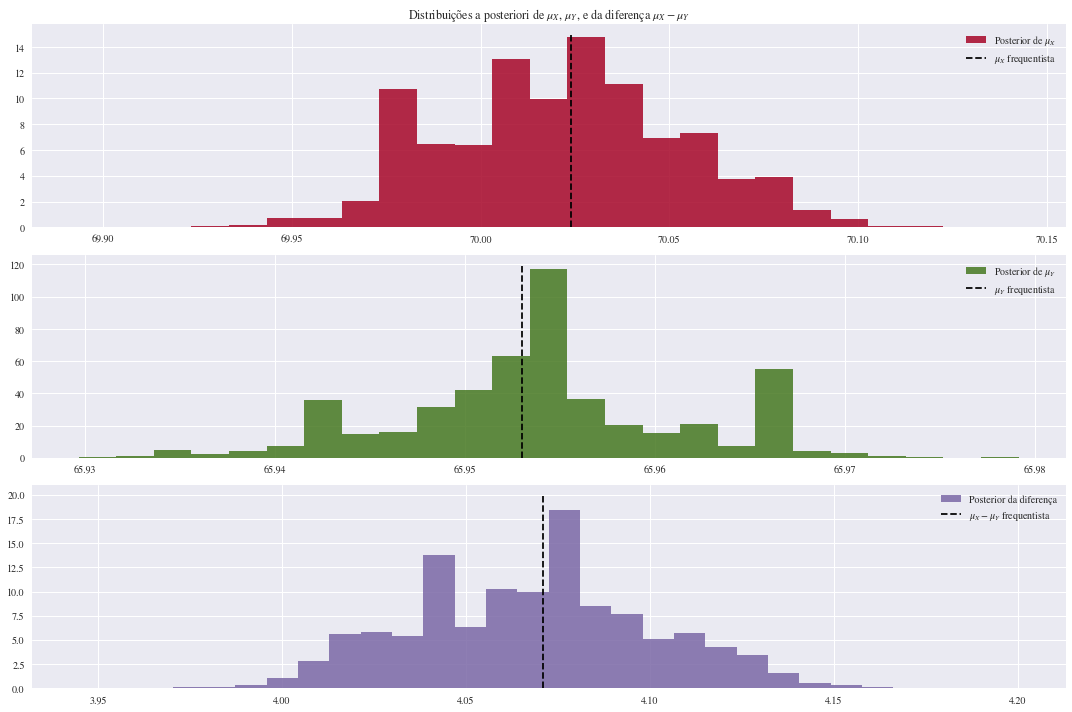

In [ ]:
X_samples = burned_trace["mu_X"]
Y_samples = burned_trace["mu_Y"]
delta_samples = burned_trace["delta"]

plt.figure(figsize=(15, 10))
ax = plt.subplot(311)

plt.hist(X_samples, histtype='stepfilled', bins=25, alpha=0.85, label="Posterior de $\mu_X$", color="#A60628", density=True)
plt.vlines(X['Rating'].mean(), 0, 15, linestyle="--", label="$\mu_X$ frequentista")
plt.legend(loc="upper right")
plt.title(r'Distribuições a posteriori de $\mu_X$, $\mu_Y$, e da diferença $\mu_X - \mu_Y$')

ax = plt.subplot(312)

plt.hist(Y_samples, histtype='stepfilled', bins=25, alpha=0.85, label="Posterior de $\mu_Y$", color="#467821", density=True)
plt.vlines( Y['Rating'].mean(), 0, 120, linestyle="--", label="$\mu_Y$ frequentista")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85, label="Posterior da diferença", color="#7A68A6", density=True)
plt.vlines(X['Rating'].mean() - Y['Rating'].mean(), 0, 20, linestyle="--", label="$\mu_X - \mu_Y$ frequentista")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

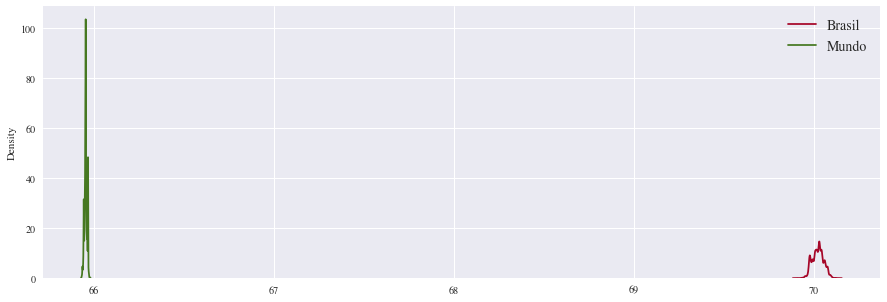

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,5))
sns.kdeplot(X_samples, color="#A60628", label='Brasil')
sns.kdeplot(Y_samples, color="#467821", label='Mundo')
plt.legend(loc='best',fontsize=14)
plt.show()

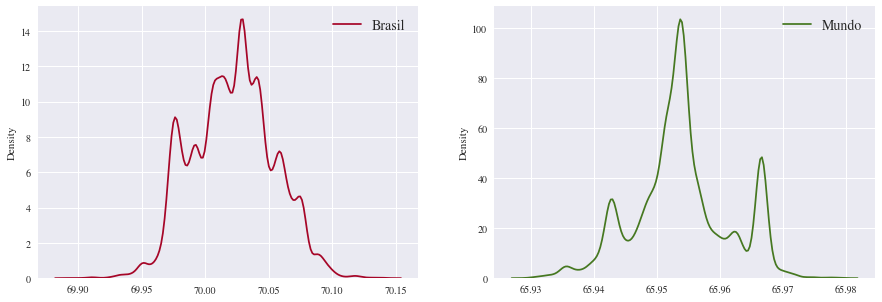

In [ ]:
plt.figure(figsize=(10,10))

ax = plt.subplot(211)
sns.kdeplot(X_samples, color="#A60628", label='Brasil')
plt.legend(loc='best',fontsize=14)

ax = plt.subplot(212)
sns.kdeplot(Y_samples, color="#467821", label='Mundo')
plt.legend(loc='best',fontsize=14)
plt.show()

Há uma incerteza muito maior na distribuição dos jogadores do Brasil, a qual pode ser observada pela altura da distribuição e consequentemente pela largura da curva sobre o eixo de suporte. Isso ocorre pois o número de elementos no conjunto de dados de jogadores brasileiros é muito menor se comparado ao conjunto de jogadores no restante do mundo, fazendo com que a confiabilidade da distribuição dessa primeira população seja menor.